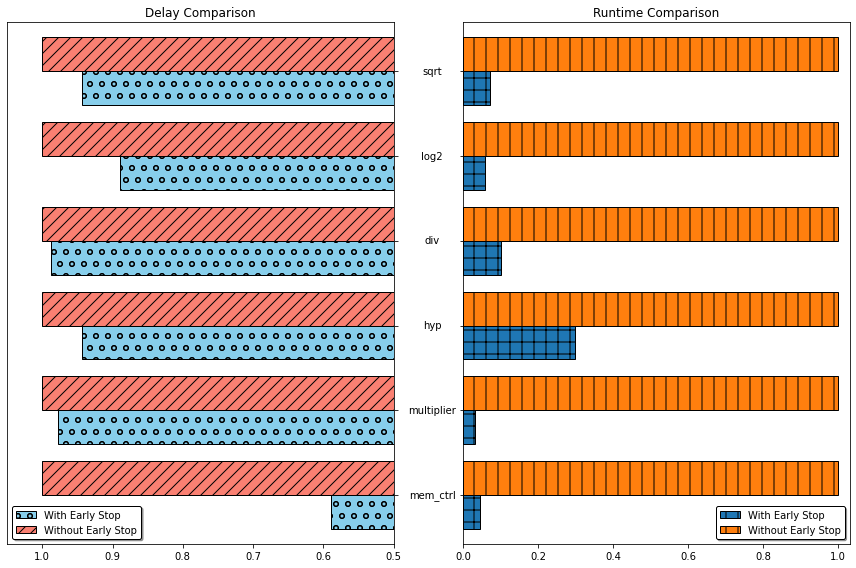

In [123]:
import csv
import matplotlib.pyplot as plt
import numpy as np

# Function to parse CSV data from a file
def parse_csv_data(file_path):
    with open(file_path, mode='r') as csvfile:
        csvreader = csv.reader(csvfile)
        next(csvreader)  # Skip the first header row
        next(csvreader)  # Skip the second header row if needed
        data = {}
        for row in csvreader:
            if row:  # Check if the row is not empty
                dataset = row[0]
                data[dataset] = {
                    'esynturbo_w_early_stop': {
                        'delay': float(row[2])/float(row[5]),
                        'runtime': float(row[3])/float(row[6]),
                    },
                    'esynturbo_wo_early_stop': {
                        'delay': 1.0,
                        'runtime': 1.0,
                    }
                }
        return data

# CSV file path
csv_file = 'data.csv'

# Read and parse the CSV data
data_parsed = parse_csv_data(csv_file)

# Set up the figure and axes for the combined comparison
fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(12, 8))

# Extract data for plotting
datasets = list(data_parsed.keys())
delays_w_early = [data_parsed[ds]['esynturbo_w_early_stop']['delay'] for ds in datasets]
delays_wo_early = [data_parsed[ds]['esynturbo_wo_early_stop']['delay'] for ds in datasets]
runtimes_w_early = [data_parsed[ds]['esynturbo_w_early_stop']['runtime'] for ds in datasets]
runtimes_wo_early = [data_parsed[ds]['esynturbo_wo_early_stop']['runtime'] for ds in datasets]

y = np.arange(len(datasets))

#colors = ['#1f77b4', '#ff7f0e']

# Plotting the data
axes[0].barh(y - 0.2, delays_w_early, height=0.4, label='With Early Stop', color='skyblue', edgecolor='black', hatch='o')
axes[0].barh(y + 0.2, delays_wo_early, height=0.4, label='Without Early Stop', color='salmon', edgecolor='black', hatch='//')
axes[1].barh(y - 0.2, runtimes_w_early, height=0.4, label = 'With Early Stop', color='#1f77b4', edgecolor='black', hatch='+')
axes[1].barh(y + 0.2, runtimes_wo_early, height=0.4, label = 'Without Early Stop', color='#ff7f0e', edgecolor='black', hatch='|')

# Setting axes properties
axes[0].set(title='Delay Comparison')
axes[0].set_xlim(0.5,)
axes[1].set(title='Runtime Comparison')
axes[0].invert_xaxis()
# axes[0].set(yticks=y, yticklabels=datasets)
axes[0].set(yticks=y, yticklabels=[])
for yloc, state in zip(y, datasets):
    axes[0].annotate(state, (0.5, yloc), xycoords=('figure fraction', 'data'),
                     ha='center', va='center')
axes[0].yaxis.tick_right()
#axes[0].set_xlim(0.5,)
axes[0].legend(frameon=True, fancybox=True, shadow=True)
axes[1].legend(frameon=True, fancybox=True, shadow=True)
axes[0].legend(frameon=True, fancybox=True, shadow=True).get_frame().set_facecolor('white')
axes[0].legend(frameon=True, fancybox=True, shadow=True).get_frame().set_edgecolor('black')
axes[1].legend(frameon=True, fancybox=True, shadow=True).get_frame().set_facecolor('white')
axes[1].legend(frameon=True, fancybox=True, shadow=True).get_frame().set_edgecolor('black')


# Adjust layout and grid
for ax in axes:
    ax.margins(0.03)
    ax.grid(False)

fig.tight_layout()
fig.subplots_adjust(wspace=0.18)

plt.savefig('EarlyStop_Effect.pdf')

# Show the plot
plt.show()